    # Automatic Jupyter Notebook for OpenML dataset 665: sleuth_case2002

In [1]:
%matplotlib inline
from scripts.preamble import *
did = 665
data = oml.datasets.get_dataset(did)
X, y, features = getData(data)
task, topList, strats, scores = getOpenMLData(did, data.default_target_attribute) 
topList[:10] 

No compatible runs found


""


In [2]:
from scripts.problemType import *
problemType = findProblemType(data) 
checkTask(task, problemType, data.default_target_attribute) 

Problem type: supervised regression problem.
Using correct task


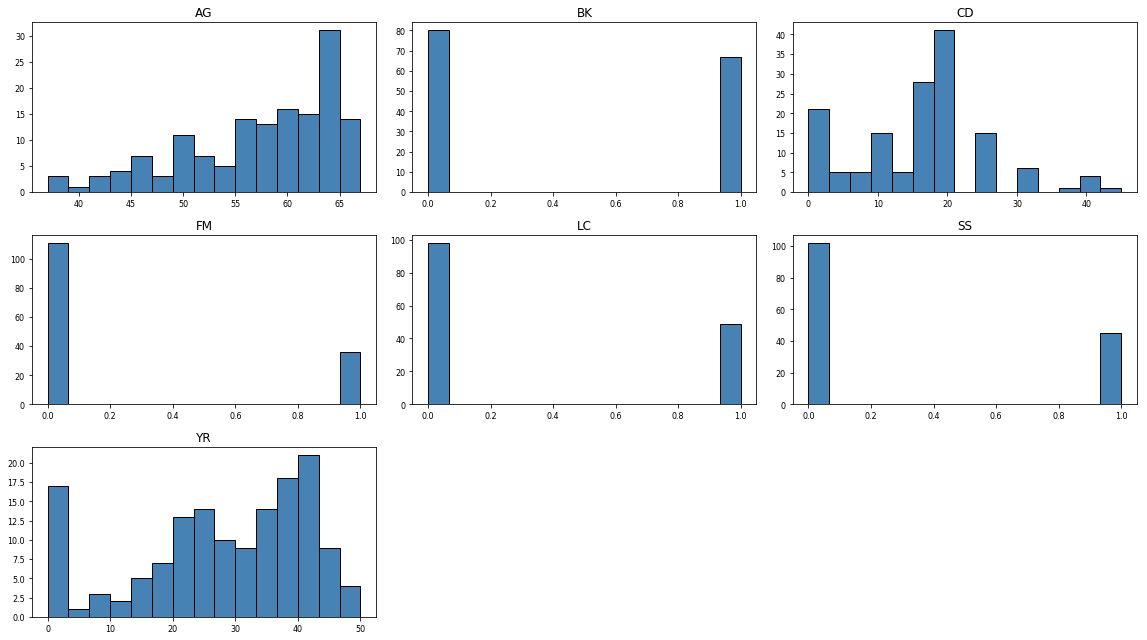

In [3]:
from scripts.dataVisualization import *
show1DHist(data) 

,FM,LC,BK,SS,AG,YR,outlier
12,1,1,1,0,61,0,-0.0993224
52,1,0,1,1,62,0,-0.0895767
144,0,1,0,1,43,19,-0.084754
134,1,0,1,1,46,16,-0.0847278
16,1,0,0,1,47,0,-0.0786875
54,0,1,1,0,37,19,-0.0765781
24,1,1,0,0,64,40,-0.0726474
27,0,1,1,1,64,13,-0.0722732
46,1,0,0,1,55,24,-0.0719635
55,0,0,0,0,37,16,-0.0693371


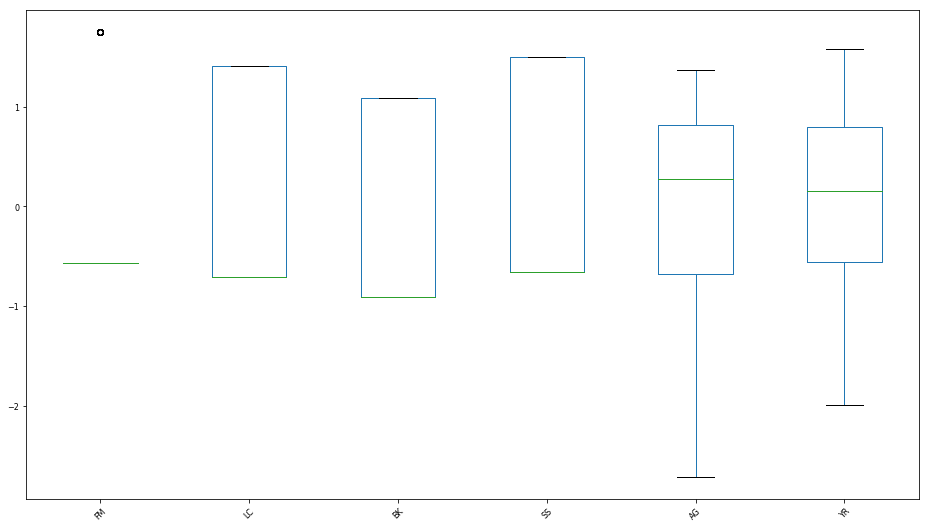

In [4]:
from scripts.outlierDetection import *
outlierDetection(X, features, 10) 

In [5]:
from scripts.localDataOpenMLInterface import *
showTopNSimilarDatasets("datasetSimilarityMatrixNormalized", did, 10) 

     did                                        name  similarity  \
0    150                                   covertype       0.837   
1    180                                   covertype       0.721   
2  40474                               thyroid-allbp       0.702   
3  40475                            thyroid-allhyper       0.702   
4  40476                             thyroid-allhypo       0.702   
5  40477                              thyroid-allrep       0.702   
6  40478                                 thyroid-dis       0.702   
7  41000  jungle_chess_2pcs_endgame_panther_elephant       0.695   
8     10                                       lymph       0.668   
9    965                                         zoo       0.612   

                              url  
0    https://www.openml.org/d/150  
1    https://www.openml.org/d/180  
2  https://www.openml.org/d/40474  
3  https://www.openml.org/d/40475  
4  https://www.openml.org/d/40476  
5  https://www.openml.org/d/40477  

Complexity threshold to determine if an algorithm will be run.


In [6]:
comp = 50000000000000

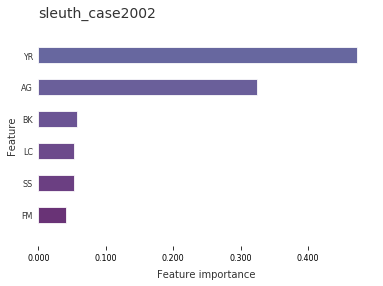

In [7]:
from scripts.featureImportance import *
featureImportance(data) 

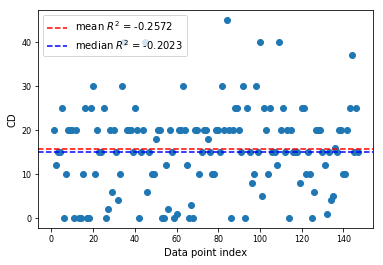

In [8]:
from scripts.baselines import *
maxBaseline = generateBaselines(data, problemType) 

Please run the full notebook then toggle removeOutliers and run this cell and the next to compare the algorithms with and without outliers. 

In [9]:
removeOutliers = False 

In [10]:
from scripts.machineLearningAlgorithms import *
strats = runMachineLearningAlgorithms(data, comp, strats, problemType, task, showRuntimePrediction=False, runTPOT=False, removeOutliers=removeOutliers)
plot_alg(data, strats, maxBaseline, problemType) 

c:\users\hugo\anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


TypeError: 'NoneType' object is not iterable

In [ ]:
from scripts.relativePerformance import * 
showRelativePerformanceBoxplot(scores, topList, strats, maxBaseline) 